In [203]:
import pandas as pd
import numpy as np
import spacy
import os
from pathlib import Path
from importlib import reload

In [204]:
import source.prepare_data as prd
import source.dataset as dat
import source.multi_layer_perceptron as mlp
import source.table as tb
import source.comparision as comp
import source.recurent_neural_networks as rnn

In [205]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)
reload(rnn)

<module 'source.recurent_neural_networks' from 'C:\\Python_files\\DL_final2\\source\\recurent_neural_networks.py'>

In [206]:
# set your path
os.chdir("C:\Python_files\DL_final2")
os.getcwd()

'C:\\Python_files\\DL_final2'

In [207]:
"""
1) Preprocessing
"""
# load models and dataset
df = pd.read_csv("hf://datasets/gxb912/large-twitter-tweets-sentiment/train.csv", nrows=2000)
nlp = spacy.load("en_core_web_sm")

# prepare dataset
df = prd.prepare_df(df, nlp)

# create dataset out of cleaned columns
dataset = dat.Text_Dataset(df, col_text="clean_text_str", col_label="sentiment", args={"max_features":5000})
dataset.split_dataset()


In [208]:
df

,sentiment,clean_text,clean_text_str,text
0,1,"[love, you, toooooo, TG, LOL, Gngb]",love you toooooo TG LOL Gngb,@tonigirl14 love you toooooo ! ! TG LOL Gngb
1,0,"[I, tell, myself, do, click, on, this, link, b...",I tell myself do click on this link but I just...,@jun6lee I told myself : Do n't click on this ...
2,0,"[the, man, who, render, his, voice, to, Mickey...",the man who render his voice to Mickey Mouse e...,The man who rendered his voice to Mickey Mouse...
3,1,"[I, think, red, would, be, nice, or, maybe, yo...",I think red would be nice or maybe you could d...,@Shontelle_Layne I think red would be nice . ...
4,0,"[I, guess, one, of, her, tweet, say, she, be, ...",I guess one of her tweet say she be confused,@Silverlines - I guess . 'Cause one of her twe...
...,...,...,...,...
1995,1,"[whoa, I, think, I, have, a, time, to, update,...",whoa I think I have a time to update this last...,whoa ! i thought I had a time to update this l...
1996,1,"[hey, you, know, at, soccer, six, you, be, mak...",hey you know at soccer six you be make a vid c...,@Marcquelle hey .. you know at soccer six you ...
1997,0,"[my, body, definitely, be, handle, this, stres...",my body definitely be handle this stress very ...,My body definitely is n't handling this stress...
1998,1,"[good, morning, over, there, Hope, you, be, we...",good morning over there Hope you be well today...,@kitwitch Good morning over there Hope you a...


In [209]:
"""
2) Accuracy analysis for MLP model. We will compare the workflow of MLP by using TD-IDF encoding and BOW encoding

2.1) TD-IDF encoding
"""
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = dataset.get_encodings(tdidf=True)

mlp_tdidf_params = mlp.find_best_mlp(X_train=X_train_TF,
                                      Y_train=Y_train_TF,
                                      X_test=X_test_TF,
                                      Y_test=Y_test_TF,
                                      n_trials = 10,
                                     encoding='TDIDF')

mlp_tdidf_params.to_pickle("checkpoints\mlp_tdidf_params.pkl")

[I 2025-06-18 13:08:28,724] A new study created in memory with name: mlp_optimization
[I 2025-06-18 13:08:32,356] Trial 0 finished with values: [0.5687322616577148, 0.699999988079071] and parameters: {'epochs': 120, 'learning_rate': 0.17733453143144448, 'units': 7}.
[I 2025-06-18 13:08:35,561] Trial 1 finished with values: [0.6329805254936218, 0.6449999809265137] and parameters: {'epochs': 109, 'learning_rate': 0.07751039269489847, 'units': 3}.
[I 2025-06-18 13:08:40,228] Trial 2 finished with values: [0.613686203956604, 0.675000011920929] and parameters: {'epochs': 161, 'learning_rate': 0.05027314766578434, 'units': 8}.
[I 2025-06-18 13:08:43,541] Trial 3 finished with values: [0.606233537197113, 0.6974999904632568] and parameters: {'epochs': 115, 'learning_rate': 0.3350539468142628, 'units': 2}.
[I 2025-06-18 13:08:48,350] Trial 4 finished with values: [0.9110162854194641, 0.6725000143051147] and parameters: {'epochs': 167, 'learning_rate': 0.38947853037240615, 'units': 8}.
[I 2025-0

In [210]:
mlp_tdidf_params

,loss,accuracy,params_epochs,params_learning_rate,params_units,time,trial_time,name
0,0.678091,0.5725,169,0.022047,5,4.800748,4.800748,MLP_TDIDF
1,0.632981,0.6450,109,0.077510,3,3.203553,3.203553,MLP_TDIDF
2,0.929825,0.6675,181,0.388818,2,5.174742,5.174742,MLP_TDIDF
3,0.911016,0.6725,167,0.389479,8,4.808715,4.808715,MLP_TDIDF
4,0.613686,0.6750,161,0.050273,8,4.665123,4.665123,MLP_TDIDF
5,0.558099,0.6825,162,0.094548,6,4.628963,4.628963,MLP_TDIDF
6,0.705624,0.6825,199,0.190604,6,5.622569,5.622569,MLP_TDIDF
7,0.564201,0.6925,128,0.163151,6,3.764288,3.764288,MLP_TDIDF
8,0.606234,0.6975,115,0.335054,2,3.312702,3.312702,MLP_TDIDF
9,0.568732,0.7000,120,0.177335,7,3.630928,3.630928,MLP_TDIDF


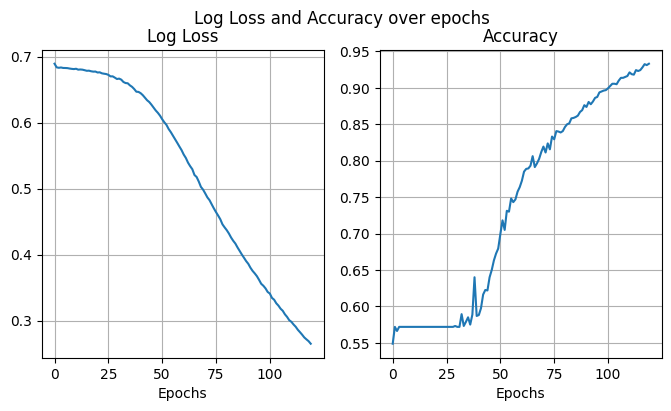

In [211]:
mlp_tdidf = mlp.Feedforward_Model(X_train_TF, Y_train_TF, units=mlp_tdidf_params.iloc[-1]['params_units']) # the last one is the best one
mlp_tdidf.train(LR=mlp_tdidf_params.iloc[-1]['params_learning_rate'], epochs=mlp_tdidf_params.iloc[-1]['params_epochs'])
mlp_tdidf.plot_loss_accuracy()

In [212]:
# Do some tests for vocab size
mlp_tdidf_vocab = comp.test_vocab_size(df,
                                     "MLP",
                                     "TDIDF",
                                     learning_rate=mlp_tdidf_params.iloc[-1]['params_learning_rate'],
                                     epochs=mlp_tdidf_params.iloc[-1]['params_epochs'],
                                     units=mlp_tdidf_params.iloc[-1]['params_units'])

Initializing vocab-size test for MLP, with embedding TDIDF.
Params: 0.17733453143144448, 120, 7
Test started........
The result is: [(1000, 0.72), (2000, 0.7125), (3000, 0.7125), (4000, 0.7275), (5000, 0.7275), (6000, 0.6975), (7000, 0.7375), (8000, 0.7125)]


In [213]:
# Tests for split ratio
mlp_tdidf_split = comp.test_split_ratio(dataset,
                                     "MLP",
                                     "TDIDF",
                                     learning_rate=mlp_tdidf_params.iloc[-1]['params_learning_rate'],
                                     epochs=mlp_tdidf_params.iloc[-1]['params_epochs'],
                                     units=mlp_tdidf_params.iloc[-1]['params_units'])

Initializing split test for MLP, with embedding TDIDF.
Params: 0.17733453143144448, 120, 7
Test started.....
The result is: [(0.1, 0.72), (0.2, 0.68), (0.3, 0.6667), (0.4, 0.7), (0.5, 0.675)]


In [214]:
"""
2.2) BOW encoding
"""
X_train_BOW, X_test_BOW, Y_train_BOW, Y_test_BOW = dataset.get_encodings(tdidf=False)

mlp_bow_params = mlp.find_best_mlp(X_train=X_train_BOW,
                                      Y_train=Y_train_BOW,
                                      X_test=X_test_BOW,
                                      Y_test=Y_test_BOW,
                                      n_trials = 10)

mlp_bow_params.to_pickle("checkpoints\mlp_bow_params.pkl")

[I 2025-06-18 13:10:00,465] A new study created in memory with name: mlp_optimization
[I 2025-06-18 13:10:04,812] Trial 0 finished with values: [1.0256452560424805, 0.6690000295639038] and parameters: {'epochs': 195, 'learning_rate': 0.14578218545738253, 'units': 8}.
[I 2025-06-18 13:10:07,403] Trial 1 finished with values: [0.8330408930778503, 0.6629999876022339] and parameters: {'epochs': 109, 'learning_rate': 0.17451006015194992, 'units': 6}.
[I 2025-06-18 13:10:10,034] Trial 2 finished with values: [1.3481084108352661, 0.6629999876022339] and parameters: {'epochs': 112, 'learning_rate': 0.4915479232817572, 'units': 10}.
[I 2025-06-18 13:10:12,914] Trial 3 finished with values: [1.3077046871185303, 0.6639999747276306] and parameters: {'epochs': 124, 'learning_rate': 0.41193470987616654, 'units': 10}.
[I 2025-06-18 13:10:16,526] Trial 4 finished with values: [1.4151184558868408, 0.6639999747276306] and parameters: {'epochs': 156, 'learning_rate': 0.4187435265574393, 'units': 10}.
[I 

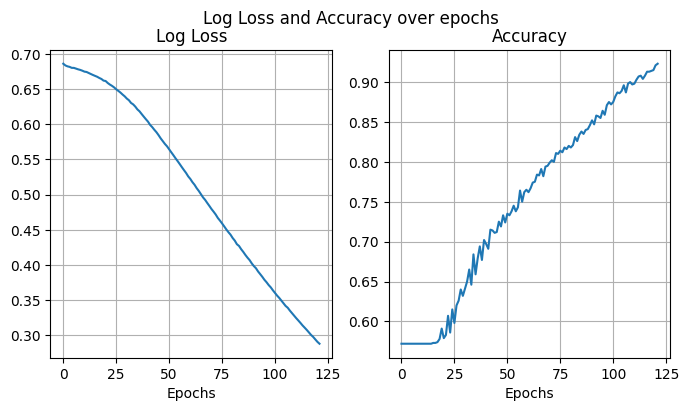

In [215]:
mlp_bow = mlp.Feedforward_Model(X_train_BOW, Y_train_BOW, units=mlp_bow_params.iloc[-1]['params_units'])
mlp_bow.train(LR=mlp_bow_params.iloc[-1]['params_learning_rate'], epochs=mlp_bow_params.iloc[-1]['params_epochs'])
mlp_bow.plot_loss_accuracy()

In [216]:
# Do some tests for vocab size
mlp_bow_vocab = comp.test_vocab_size(df,
                                     "MLP",
                                     "BOW",
                                     learning_rate=mlp_bow_params.iloc[-1]['params_learning_rate'],
                                     epochs=mlp_bow_params.iloc[-1]['params_epochs'],
                                     units=mlp_bow_params.iloc[-1]['params_units'])

Initializing vocab-size test for MLP, with embedding BOW.
Params: 0.07303664279842886, 122, 9
Test started........
The result is: [(1000, 0.68), (2000, 0.695), (3000, 0.7), (4000, 0.715), (5000, 0.7025), (6000, 0.68), (7000, 0.69), (8000, 0.73)]


In [217]:
# Tests for split ratio
mlp_bow_split = comp.test_split_ratio(dataset,
                                     "MLP",
                                     "BOW",
                                     learning_rate=mlp_bow_params.iloc[-1]['params_learning_rate'],
                                     epochs=mlp_bow_params.iloc[-1]['params_epochs'],
                                     units=mlp_bow_params.iloc[-1]['params_units'])

Initializing split test for MLP, with embedding BOW.
Params: 0.07303664279842886, 122, 9
Test started.....
The result is: [(0.1, 0.69), (0.2, 0.6725), (0.3, 0.685), (0.4, 0.6587), (0.5, 0.695)]


In [218]:
"""
2.3) classical RNN with embedding encoding
"""
X_train_EBM, X_test_EBM, Y_train_EBM, Y_test_EBM = dataset.get_sequences(vocab_size=1000, maxlen=10)

In [219]:
rnn_emb_params = rnn.find_best_rnn(X_train_EBM, Y_train_EBM, X_test_EBM, Y_test_EBM, n_trials=10)
rnn_emb_params.to_pickle(r"checkpoints\rnn_emb_params.pkl")

[I 2025-06-18 13:11:28,831] A new study created in memory with name: mlp_optimization


Epoch 1/188
6/6 [==============================] - 1s 23ms/step - loss: 0.6928 - accuracy: 0.5075 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 2/188
6/6 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5813 - val_loss: 0.6878 - val_accuracy: 0.5450
Epoch 3/188
6/6 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.5813 - val_loss: 0.6863 - val_accuracy: 0.5400
Epoch 4/188
6/6 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5800 - val_loss: 0.6855 - val_accuracy: 0.5450
Epoch 5/188
6/6 [==============================] - 0s 4ms/step - loss: 0.6587 - accuracy: 0.5813 - val_loss: 0.6847 - val_accuracy: 0.5550
Epoch 6/188
6/6 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.5925 - val_loss: 0.6818 - val_accuracy: 0.5450
Epoch 7/188
6/6 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6200 - val_loss: 0.6779 - val_accuracy: 0.5650
Epoch 8/188
6/6 [=========

[I 2025-06-18 13:11:34,027] Trial 0 finished with values: [1.770776391029358, 0.5649999976158142] and parameters: {'epochs': 188, 'learning_rate': 0.002157995941964665, 'units': 5, 'two_layers': False, 'batch_size': 154}.


Epoch 1/114
6/6 [==============================] - 1s 23ms/step - loss: 0.6926 - accuracy: 0.5412 - val_loss: 0.6891 - val_accuracy: 0.5450
Epoch 2/114
6/6 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5788 - val_loss: 0.7120 - val_accuracy: 0.5100
Epoch 3/114
6/6 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.6700 - val_loss: 0.8626 - val_accuracy: 0.4900
Epoch 4/114
6/6 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7450 - val_loss: 0.9928 - val_accuracy: 0.4850
Epoch 5/114
6/6 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8275 - val_loss: 1.2574 - val_accuracy: 0.4750
Epoch 6/114
6/6 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.8650 - val_loss: 1.1292 - val_accuracy: 0.5000
Epoch 7/114
6/6 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.8800 - val_loss: 1.2811 - val_accuracy: 0.5400
Epoch 8/114
6/6 [=========

[I 2025-06-18 13:11:37,416] Trial 1 finished with values: [1.2165697813034058, 0.5590000152587891] and parameters: {'epochs': 114, 'learning_rate': 0.10347467730919688, 'units': 6, 'two_layers': False, 'batch_size': 145}.


Epoch 1/104
7/7 [==============================] - 1s 26ms/step - loss: 0.7362 - accuracy: 0.5063 - val_loss: 0.7166 - val_accuracy: 0.5450
Epoch 2/104
7/7 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5738 - val_loss: 0.6906 - val_accuracy: 0.5450
Epoch 3/104
7/7 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.5213 - val_loss: 0.7131 - val_accuracy: 0.5450
Epoch 4/104
7/7 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5362 - val_loss: 0.6945 - val_accuracy: 0.5450
Epoch 5/104
7/7 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5788 - val_loss: 0.8514 - val_accuracy: 0.5450
Epoch 6/104
7/7 [==============================] - 0s 4ms/step - loss: 0.8007 - accuracy: 0.5400 - val_loss: 0.8259 - val_accuracy: 0.4550
Epoch 7/104
7/7 [==============================] - 0s 4ms/step - loss: 0.7729 - accuracy: 0.5213 - val_loss: 0.6968 - val_accuracy: 0.5450
Epoch 8/104
7/7 [=========

[I 2025-06-18 13:11:41,294] Trial 2 finished with values: [0.7166306376457214, 0.5720000267028809] and parameters: {'epochs': 104, 'learning_rate': 0.30943618825312785, 'units': 6, 'two_layers': True, 'batch_size': 133}.


Epoch 1/192
15/15 [==============================] - 1s 12ms/step - loss: 0.6905 - accuracy: 0.5362 - val_loss: 0.6920 - val_accuracy: 0.5400
Epoch 2/192
15/15 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.6950 - val_loss: 0.7836 - val_accuracy: 0.5200
Epoch 3/192
15/15 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7763 - val_loss: 0.9187 - val_accuracy: 0.4700
Epoch 4/192
15/15 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8487 - val_loss: 1.0099 - val_accuracy: 0.4850
Epoch 5/192
15/15 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8612 - val_loss: 1.0309 - val_accuracy: 0.5000
Epoch 6/192
15/15 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8525 - val_loss: 1.1195 - val_accuracy: 0.5000
Epoch 7/192
15/15 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8300 - val_loss: 1.1094 - val_accuracy: 0.5000
Epoch 8/192


[I 2025-06-18 13:11:49,955] Trial 3 finished with values: [1.05843186378479, 0.5509999990463257] and parameters: {'epochs': 192, 'learning_rate': 0.02909105519181359, 'units': 4, 'two_layers': True, 'batch_size': 54}.


Epoch 1/181
7/7 [==============================] - 1s 26ms/step - loss: 0.6933 - accuracy: 0.5475 - val_loss: 0.6763 - val_accuracy: 0.5700
Epoch 2/181
7/7 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.6837 - val_loss: 0.6988 - val_accuracy: 0.6000
Epoch 3/181
7/7 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7625 - val_loss: 0.7244 - val_accuracy: 0.6400
Epoch 4/181
7/7 [==============================] - 0s 4ms/step - loss: 0.3689 - accuracy: 0.8487 - val_loss: 0.8056 - val_accuracy: 0.6000
Epoch 5/181
7/7 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.8850 - val_loss: 0.9484 - val_accuracy: 0.6100
Epoch 6/181
7/7 [==============================] - 0s 4ms/step - loss: 0.2476 - accuracy: 0.9050 - val_loss: 1.0547 - val_accuracy: 0.6050
Epoch 7/181
7/7 [==============================] - 0s 4ms/step - loss: 0.2062 - accuracy: 0.9362 - val_loss: 1.2103 - val_accuracy: 0.5800
Epoch 8/181
7/7 [=========

[I 2025-06-18 13:11:56,015] Trial 4 finished with values: [3.2813897132873535, 0.527999997138977] and parameters: {'epochs': 181, 'learning_rate': 0.0205707995297851, 'units': 7, 'two_layers': True, 'batch_size': 115}.


Epoch 1/106
12/12 [==============================] - 1s 11ms/step - loss: 0.6889 - accuracy: 0.5537 - val_loss: 0.6895 - val_accuracy: 0.5450
Epoch 2/106
12/12 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6350 - val_loss: 0.6744 - val_accuracy: 0.6200
Epoch 3/106
12/12 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7375 - val_loss: 0.8073 - val_accuracy: 0.5550
Epoch 4/106
12/12 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8175 - val_loss: 0.9129 - val_accuracy: 0.5350
Epoch 5/106
12/12 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8675 - val_loss: 1.0681 - val_accuracy: 0.5800
Epoch 6/106
12/12 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8712 - val_loss: 0.9790 - val_accuracy: 0.5800
Epoch 7/106
12/12 [==============================] - 0s 3ms/step - loss: 0.2826 - accuracy: 0.8863 - val_loss: 1.1813 - val_accuracy: 0.5350
Epoch 8/106


[I 2025-06-18 13:11:59,864] Trial 5 finished with values: [2.7038052082061768, 0.5350000262260437] and parameters: {'epochs': 106, 'learning_rate': 0.025712727610516153, 'units': 8, 'two_layers': False, 'batch_size': 67}.


Epoch 1/119
6/6 [==============================] - 1s 31ms/step - loss: 0.6984 - accuracy: 0.5350 - val_loss: 0.7022 - val_accuracy: 0.4550
Epoch 2/119
6/6 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5437 - val_loss: 0.7254 - val_accuracy: 0.5450
Epoch 3/119
6/6 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5788 - val_loss: 0.6891 - val_accuracy: 0.5450
Epoch 4/119
6/6 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.5788 - val_loss: 0.6938 - val_accuracy: 0.5450
Epoch 5/119
6/6 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.5788 - val_loss: 0.6912 - val_accuracy: 0.5450
Epoch 6/119
6/6 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.5788 - val_loss: 0.6911 - val_accuracy: 0.5450
Epoch 7/119
6/6 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.5788 - val_loss: 0.6932 - val_accuracy: 0.5450
Epoch 8/119
6/6 [=========

[I 2025-06-18 13:12:04,034] Trial 6 finished with values: [0.7300419211387634, 0.5619999766349792] and parameters: {'epochs': 119, 'learning_rate': 0.07757551030397182, 'units': 5, 'two_layers': True, 'batch_size': 144}.


Epoch 1/178
73/73 [==============================] - 1s 3ms/step - loss: 0.8085 - accuracy: 0.5337 - val_loss: 1.0062 - val_accuracy: 0.4950
Epoch 2/178
73/73 [==============================] - 0s 1ms/step - loss: 0.8082 - accuracy: 0.5437 - val_loss: 0.7778 - val_accuracy: 0.4700
Epoch 3/178
73/73 [==============================] - 0s 1ms/step - loss: 0.8080 - accuracy: 0.5675 - val_loss: 0.9326 - val_accuracy: 0.5100
Epoch 4/178
73/73 [==============================] - 0s 1ms/step - loss: 0.8052 - accuracy: 0.5300 - val_loss: 0.7936 - val_accuracy: 0.4800
Epoch 5/178
73/73 [==============================] - 0s 1ms/step - loss: 0.7833 - accuracy: 0.5213 - val_loss: 0.7692 - val_accuracy: 0.4700
Epoch 6/178
73/73 [==============================] - 0s 1ms/step - loss: 0.8063 - accuracy: 0.5088 - val_loss: 0.7498 - val_accuracy: 0.5350
Epoch 7/178
73/73 [==============================] - 0s 1ms/step - loss: 0.7613 - accuracy: 0.5450 - val_loss: 0.9343 - val_accuracy: 0.5150
Epoch 8/178
7

[I 2025-06-18 13:12:21,692] Trial 7 finished with values: [0.8786764144897461, 0.5529999732971191] and parameters: {'epochs': 178, 'learning_rate': 0.4350461080972704, 'units': 6, 'two_layers': False, 'batch_size': 11}.


Epoch 1/139
4/4 [==============================] - 2s 51ms/step - loss: 0.8138 - accuracy: 0.5312 - val_loss: 0.8529 - val_accuracy: 0.5550
Epoch 2/139
4/4 [==============================] - 0s 7ms/step - loss: 0.8286 - accuracy: 0.5025 - val_loss: 0.8262 - val_accuracy: 0.5500
Epoch 3/139
4/4 [==============================] - 0s 7ms/step - loss: 0.7285 - accuracy: 0.5975 - val_loss: 0.8132 - val_accuracy: 0.4800
Epoch 4/139
4/4 [==============================] - 0s 7ms/step - loss: 0.7255 - accuracy: 0.5125 - val_loss: 0.7391 - val_accuracy: 0.5450
Epoch 5/139
4/4 [==============================] - 0s 7ms/step - loss: 0.7117 - accuracy: 0.4888 - val_loss: 0.7499 - val_accuracy: 0.5400
Epoch 6/139
4/4 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5688 - val_loss: 0.7807 - val_accuracy: 0.5250
Epoch 7/139
4/4 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.5700 - val_loss: 0.7119 - val_accuracy: 0.5100
Epoch 8/139
4/4 [=========

[I 2025-06-18 13:12:26,653] Trial 8 finished with values: [0.7069346904754639, 0.5669999718666077] and parameters: {'epochs': 139, 'learning_rate': 0.4260547317543868, 'units': 10, 'two_layers': True, 'batch_size': 237}.


Epoch 1/180
5/5 [==============================] - 1s 39ms/step - loss: 0.7743 - accuracy: 0.5312 - val_loss: 0.7265 - val_accuracy: 0.4900
Epoch 2/180
5/5 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5225 - val_loss: 0.8261 - val_accuracy: 0.4600
Epoch 3/180
5/5 [==============================] - 0s 6ms/step - loss: 0.6982 - accuracy: 0.5763 - val_loss: 0.6935 - val_accuracy: 0.5450
Epoch 4/180
5/5 [==============================] - 0s 6ms/step - loss: 0.6768 - accuracy: 0.5638 - val_loss: 0.7322 - val_accuracy: 0.5450
Epoch 5/180
5/5 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.5788 - val_loss: 0.7114 - val_accuracy: 0.5450
Epoch 6/180
5/5 [==============================] - 0s 6ms/step - loss: 0.6765 - accuracy: 0.5587 - val_loss: 0.7100 - val_accuracy: 0.5450
Epoch 7/180
5/5 [==============================] - 0s 6ms/step - loss: 0.6699 - accuracy: 0.5788 - val_loss: 0.7618 - val_accuracy: 0.4400
Epoch 8/180
5/5 [=========

[I 2025-06-18 13:12:32,243] Trial 9 finished with values: [0.7233617901802063, 0.5370000004768372] and parameters: {'epochs': 180, 'learning_rate': 0.21544289758771826, 'units': 7, 'two_layers': True, 'batch_size': 176}.


In [220]:
rnn_emb_params

,loss,accuracy,params_batch_size,params_epochs,params_learning_rate,params_two_layers,params_units,time,trial_time,name
0,3.281390,0.528,115,181,0.020571,True,7,6.060033,6.060033,RNN_EBM
1,2.703805,0.535,67,106,0.025713,False,8,3.846804,3.846804,RNN_EBM
2,0.723362,0.537,176,180,0.215443,True,7,5.589068,5.589068,RNN_EBM
3,1.058432,0.551,54,192,0.029091,True,4,8.659920,8.659920,RNN_EBM
4,0.878676,0.553,11,178,0.435046,False,6,17.656700,17.656700,RNN_EBM
5,1.216570,0.559,145,114,0.103475,False,6,3.389497,3.389497,RNN_EBM
6,0.730042,0.562,144,119,0.077576,True,5,4.169443,4.169443,RNN_EBM
7,1.770776,0.565,154,188,0.002158,False,5,5.195301,5.195301,RNN_EBM
8,0.706935,0.567,237,139,0.426055,True,10,4.960833,4.960833,RNN_EBM
9,0.716631,0.572,133,104,0.309436,True,6,3.876790,3.876790,RNN_EBM


In [221]:
rnn_ebm = rnn.Recurrent_Model(X=X_train_EBM,
                              Y=Y_train_EBM,
                              input_dim=1004,
                              output_dim=1,
                              units=rnn_emb_params.iloc[-1]['params_units'],
                              rnn_type="RNN",
                              two_layers=rnn_emb_params.iloc[-1]['params_two_layers'])

rnn_ebm.train(LR=rnn_emb_params.iloc[-1]['params_learning_rate'],
              epochs=rnn_emb_params.iloc[-1]['params_epochs'],
              batch_size=rnn_emb_params.iloc[-1]['params_batch_size'],
              verbose=1,
              validation_split=0.2)


Epoch 1/104
7/7 [==============================] - 1s 26ms/step - loss: 0.7592 - accuracy: 0.5063 - val_loss: 0.9185 - val_accuracy: 0.5450
Epoch 2/104
7/7 [==============================] - 0s 4ms/step - loss: 0.8284 - accuracy: 0.5675 - val_loss: 0.7263 - val_accuracy: 0.4550
Epoch 3/104
7/7 [==============================] - 0s 4ms/step - loss: 0.7520 - accuracy: 0.5450 - val_loss: 0.7639 - val_accuracy: 0.5450
Epoch 4/104
7/7 [==============================] - 0s 4ms/step - loss: 0.7022 - accuracy: 0.5625 - val_loss: 0.6934 - val_accuracy: 0.5450
Epoch 5/104
7/7 [==============================] - 0s 5ms/step - loss: 0.7245 - accuracy: 0.5788 - val_loss: 0.6916 - val_accuracy: 0.5450
Epoch 6/104
7/7 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.4825 - val_loss: 0.6955 - val_accuracy: 0.5450
Epoch 7/104
7/7 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5788 - val_loss: 0.6891 - val_accuracy: 0.5450
Epoch 8/104
7/7 [=========

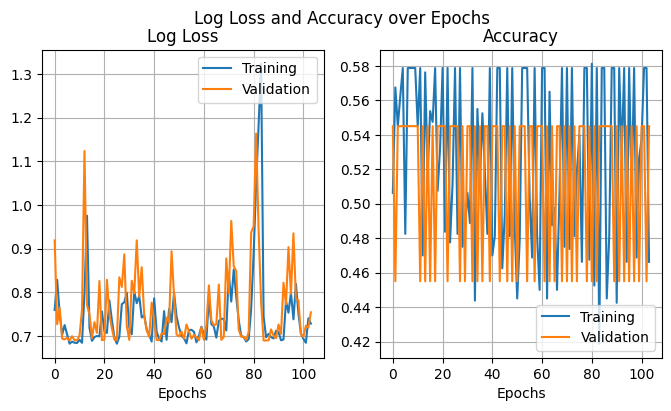

In [222]:
rnn_ebm.plot_loss_accuracy()

In [223]:
rnn_ebm_split = comp.test_split_ratio(dataset,
                                      "RNN",
                                      "EBM",
                                      learning_rate=rnn_emb_params.iloc[-1]['params_learning_rate'],
                                      epochs=rnn_emb_params.iloc[-1]['params_epochs'],
                                      units=rnn_emb_params.iloc[-1]['params_units'],
                                      batch_size=rnn_emb_params.iloc[-1]['params_batch_size'],
                                      two_layers=rnn_emb_params.iloc[-1]['params_two_layers']
                                      )

Initializing split test for RNN, with embedding EBM.
Params: 0.30943618825312785, 104, 6
Test started.....
The result is: [(0.1, 0.57), (0.2, 0.5575), (0.3, 0.44), (0.4, 0.5725), (0.5, 0.554)]


In [224]:
rnn_ebm_vocab = comp.test_vocab_size(df,
                                      "RNN",
                                      "EBM",
                                      learning_rate=rnn_emb_params.iloc[-1]['params_learning_rate'],
                                      epochs=rnn_emb_params.iloc[-1]['params_epochs'],
                                      units=rnn_emb_params.iloc[-1]['params_units'],
                                      batch_size=rnn_emb_params.iloc[-1]['params_batch_size'],
                                      two_layers=rnn_emb_params.iloc[-1]['params_two_layers']
                                      )

Initializing vocab-size test for RNN, with embedding EBM.
Params: 0.30943618825312785, 104, 6
Test started........
The result is: [(1000, 0.5725), (2000, 0.4275), (3000, 0.5725), (4000, 0.5725), (5000, 0.5), (6000, 0.4275), (7000, 0.4925), (8000, 0.475)]


In [225]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)
reload(rnn)

<module 'source.recurent_neural_networks' from 'C:\\Python_files\\DL_final2\\source\\recurent_neural_networks.py'>

In [226]:
"""
2.4) LSTM with embedding encoding
"""
lstm_emb_params = rnn.find_best_rnn(X_train_EBM, Y_train_EBM, X_test_EBM, Y_test_EBM, n_trials=10, rnn_type="LSTM")
lstm_emb_params.to_pickle(r"checkpoints\lstm_emb_params.pkl")


[I 2025-06-18 13:13:14,179] A new study created in memory with name: mlp_optimization


Epoch 1/190
6/6 [==============================] - 1s 42ms/step - loss: 0.7938 - accuracy: 0.5163 - val_loss: 0.6796 - val_accuracy: 0.5450
Epoch 2/190
6/6 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5825 - val_loss: 0.6557 - val_accuracy: 0.6100
Epoch 3/190
6/6 [==============================] - 0s 5ms/step - loss: 0.6575 - accuracy: 0.6050 - val_loss: 0.6961 - val_accuracy: 0.6100
Epoch 4/190
6/6 [==============================] - 0s 5ms/step - loss: 0.6493 - accuracy: 0.6275 - val_loss: 0.6939 - val_accuracy: 0.6350
Epoch 5/190
6/6 [==============================] - 0s 5ms/step - loss: 0.6187 - accuracy: 0.6762 - val_loss: 0.7046 - val_accuracy: 0.6100
Epoch 6/190
6/6 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.6787 - val_loss: 0.6989 - val_accuracy: 0.6100
Epoch 7/190
6/6 [==============================] - 0s 5ms/step - loss: 0.5700 - accuracy: 0.6988 - val_loss: 0.7344 - val_accuracy: 0.5650
Epoch 8/190
6/6 [=========

[I 2025-06-18 13:13:20,546] Trial 0 finished with values: [0.9784772992134094, 0.5580000281333923] and parameters: {'epochs': 190, 'learning_rate': 0.4787885127226157, 'units': 8, 'two_layers': False, 'batch_size': 145}.


Epoch 1/152
8/8 [==============================] - 2s 49ms/step - loss: 0.7124 - accuracy: 0.5713 - val_loss: 0.7761 - val_accuracy: 0.5450
Epoch 2/152
8/8 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5788 - val_loss: 0.6889 - val_accuracy: 0.5450
Epoch 3/152
8/8 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5788 - val_loss: 0.6953 - val_accuracy: 0.5450
Epoch 4/152
8/8 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5788 - val_loss: 0.6938 - val_accuracy: 0.5450
Epoch 5/152
8/8 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.5788 - val_loss: 0.6891 - val_accuracy: 0.5450
Epoch 6/152
8/8 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.5788 - val_loss: 0.6895 - val_accuracy: 0.5450
Epoch 7/152
8/8 [==============================] - 0s 5ms/step - loss: 0.6803 - accuracy: 0.5788 - val_loss: 0.6921 - val_accuracy: 0.5450
Epoch 8/152
8/8 [=========

[I 2025-06-18 13:13:28,410] Trial 1 finished with values: [1.0791429281234741, 0.625] and parameters: {'epochs': 152, 'learning_rate': 0.16246747480816295, 'units': 10, 'two_layers': True, 'batch_size': 113}.


Epoch 1/183
24/24 [==============================] - 1s 10ms/step - loss: 0.6864 - accuracy: 0.5700 - val_loss: 0.7060 - val_accuracy: 0.5550
Epoch 2/183
24/24 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6400 - val_loss: 0.7069 - val_accuracy: 0.5400
Epoch 3/183
24/24 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6450 - val_loss: 0.8366 - val_accuracy: 0.5200
Epoch 4/183
24/24 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6737 - val_loss: 0.7361 - val_accuracy: 0.5700
Epoch 5/183
24/24 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7287 - val_loss: 0.8101 - val_accuracy: 0.5550
Epoch 6/183
24/24 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7425 - val_loss: 0.9338 - val_accuracy: 0.5400
Epoch 7/183
24/24 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7475 - val_loss: 0.9233 - val_accuracy: 0.5150
Epoch 8/183


[I 2025-06-18 13:13:39,191] Trial 2 finished with values: [0.8384358882904053, 0.5410000085830688] and parameters: {'epochs': 183, 'learning_rate': 0.3359037269181986, 'units': 4, 'two_layers': False, 'batch_size': 34}.


Epoch 1/125
5/5 [==============================] - 2s 85ms/step - loss: 0.8086 - accuracy: 0.5125 - val_loss: 0.6977 - val_accuracy: 0.5450
Epoch 2/125
5/5 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5788 - val_loss: 0.6906 - val_accuracy: 0.5450
Epoch 3/125
5/5 [==============================] - 0s 7ms/step - loss: 0.6745 - accuracy: 0.5788 - val_loss: 0.7517 - val_accuracy: 0.5450
Epoch 4/125
5/5 [==============================] - 0s 8ms/step - loss: 0.6726 - accuracy: 0.5800 - val_loss: 0.7020 - val_accuracy: 0.5200
Epoch 5/125
5/5 [==============================] - 0s 7ms/step - loss: 0.6511 - accuracy: 0.6137 - val_loss: 0.7085 - val_accuracy: 0.5450
Epoch 6/125
5/5 [==============================] - 0s 7ms/step - loss: 0.6565 - accuracy: 0.5938 - val_loss: 0.7275 - val_accuracy: 0.5250
Epoch 7/125
5/5 [==============================] - 0s 7ms/step - loss: 0.6516 - accuracy: 0.6175 - val_loss: 0.7531 - val_accuracy: 0.5400
Epoch 8/125
5/5 [=========

[I 2025-06-18 13:13:45,100] Trial 3 finished with values: [0.7954866290092468, 0.5389999747276306] and parameters: {'epochs': 125, 'learning_rate': 0.4410156697043067, 'units': 8, 'two_layers': True, 'batch_size': 188}.


Epoch 1/131
6/6 [==============================] - 2s 67ms/step - loss: 0.6994 - accuracy: 0.5412 - val_loss: 0.7130 - val_accuracy: 0.5450
Epoch 2/131
6/6 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.5487 - val_loss: 0.7051 - val_accuracy: 0.5450
Epoch 3/131
6/6 [==============================] - 0s 6ms/step - loss: 0.7160 - accuracy: 0.5612 - val_loss: 0.7135 - val_accuracy: 0.4550
Epoch 4/131
6/6 [==============================] - 0s 6ms/step - loss: 0.7073 - accuracy: 0.5362 - val_loss: 0.6968 - val_accuracy: 0.5450
Epoch 5/131
6/6 [==============================] - 0s 6ms/step - loss: 0.7023 - accuracy: 0.4712 - val_loss: 0.7149 - val_accuracy: 0.5450
Epoch 6/131
6/6 [==============================] - 0s 6ms/step - loss: 0.6985 - accuracy: 0.5788 - val_loss: 0.6913 - val_accuracy: 0.5450
Epoch 7/131
6/6 [==============================] - 0s 6ms/step - loss: 0.6835 - accuracy: 0.5213 - val_loss: 0.7335 - val_accuracy: 0.5450
Epoch 8/131
6/6 [=========

[I 2025-06-18 13:13:51,504] Trial 4 finished with values: [0.6856309175491333, 0.5720000267028809] and parameters: {'epochs': 131, 'learning_rate': 0.3558455249762146, 'units': 8, 'two_layers': True, 'batch_size': 148}.


Epoch 1/103
4/4 [==============================] - 2s 69ms/step - loss: 0.9773 - accuracy: 0.5000 - val_loss: 0.6997 - val_accuracy: 0.4550
Epoch 2/103
4/4 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5275 - val_loss: 0.6977 - val_accuracy: 0.5350
Epoch 3/103
4/4 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.5962 - val_loss: 0.7223 - val_accuracy: 0.5250
Epoch 4/103
4/4 [==============================] - 0s 7ms/step - loss: 0.6611 - accuracy: 0.6237 - val_loss: 0.7347 - val_accuracy: 0.5350
Epoch 5/103
4/4 [==============================] - 0s 7ms/step - loss: 0.6236 - accuracy: 0.6450 - val_loss: 0.7723 - val_accuracy: 0.5250
Epoch 6/103
4/4 [==============================] - 0s 7ms/step - loss: 0.6031 - accuracy: 0.6812 - val_loss: 0.7716 - val_accuracy: 0.5300
Epoch 7/103
4/4 [==============================] - 0s 7ms/step - loss: 0.5614 - accuracy: 0.7237 - val_loss: 0.8856 - val_accuracy: 0.5150
Epoch 8/103
4/4 [=========

[I 2025-06-18 13:13:56,041] Trial 5 finished with values: [0.9616096615791321, 0.5090000033378601] and parameters: {'epochs': 103, 'learning_rate': 0.48788091583022614, 'units': 10, 'two_layers': False, 'batch_size': 202}.


Epoch 1/100
6/6 [==============================] - 2s 69ms/step - loss: 0.7279 - accuracy: 0.5587 - val_loss: 0.6920 - val_accuracy: 0.5450
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6780 - accuracy: 0.5888 - val_loss: 0.6812 - val_accuracy: 0.5650
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6336 - accuracy: 0.6625 - val_loss: 0.6746 - val_accuracy: 0.6050
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5842 - accuracy: 0.7175 - val_loss: 0.7323 - val_accuracy: 0.6150
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.7462 - val_loss: 0.6951 - val_accuracy: 0.5950
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5362 - accuracy: 0.7600 - val_loss: 0.7560 - val_accuracy: 0.5700
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5007 - accuracy: 0.7800 - val_loss: 0.7945 - val_accuracy: 0.5800
Epoch 8/100
6/6 [=========

[I 2025-06-18 13:14:01,384] Trial 6 finished with values: [1.0194157361984253, 0.6079999804496765] and parameters: {'epochs': 100, 'learning_rate': 0.2175582782238301, 'units': 5, 'two_layers': True, 'batch_size': 145}.


Epoch 1/139
10/10 [==============================] - 1s 24ms/step - loss: 0.6830 - accuracy: 0.5713 - val_loss: 0.6995 - val_accuracy: 0.5450
Epoch 2/139
10/10 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.5788 - val_loss: 0.6864 - val_accuracy: 0.5450
Epoch 3/139
10/10 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.5938 - val_loss: 0.6771 - val_accuracy: 0.5450
Epoch 4/139
10/10 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7237 - val_loss: 0.6338 - val_accuracy: 0.6300
Epoch 5/139
10/10 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7775 - val_loss: 0.6400 - val_accuracy: 0.6750
Epoch 6/139
10/10 [==============================] - 0s 4ms/step - loss: 0.3781 - accuracy: 0.8400 - val_loss: 0.7298 - val_accuracy: 0.6550
Epoch 7/139
10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8637 - val_loss: 0.7966 - val_accuracy: 0.6600
Epoch 8/139


[I 2025-06-18 13:14:07,142] Trial 7 finished with values: [3.3159215450286865, 0.6309999823570251] and parameters: {'epochs': 139, 'learning_rate': 0.013973842731605547, 'units': 7, 'two_layers': False, 'batch_size': 82}.


Epoch 1/169
4/4 [==============================] - 1s 68ms/step - loss: 0.6861 - accuracy: 0.5838 - val_loss: 0.6913 - val_accuracy: 0.5450
Epoch 2/169
4/4 [==============================] - 0s 7ms/step - loss: 0.6649 - accuracy: 0.5788 - val_loss: 0.6934 - val_accuracy: 0.5450
Epoch 3/169
4/4 [==============================] - 0s 7ms/step - loss: 0.5904 - accuracy: 0.6800 - val_loss: 0.6817 - val_accuracy: 0.5700
Epoch 4/169
4/4 [==============================] - 0s 7ms/step - loss: 0.4781 - accuracy: 0.7638 - val_loss: 0.7317 - val_accuracy: 0.5900
Epoch 5/169
4/4 [==============================] - 0s 7ms/step - loss: 0.4237 - accuracy: 0.8025 - val_loss: 0.8492 - val_accuracy: 0.6000
Epoch 6/169
4/4 [==============================] - 0s 7ms/step - loss: 0.3953 - accuracy: 0.8475 - val_loss: 0.8845 - val_accuracy: 0.5850
Epoch 7/169
4/4 [==============================] - 0s 7ms/step - loss: 0.3260 - accuracy: 0.8712 - val_loss: 0.8884 - val_accuracy: 0.6050
Epoch 8/169
4/4 [=========

[I 2025-06-18 13:14:12,374] Trial 8 finished with values: [2.275033473968506, 0.6190000176429749] and parameters: {'epochs': 169, 'learning_rate': 0.1403217254978637, 'units': 5, 'two_layers': False, 'batch_size': 233}.


Epoch 1/160
160/160 [==============================] - 2s 4ms/step - loss: 0.6867 - accuracy: 0.5725 - val_loss: 0.6901 - val_accuracy: 0.5450
Epoch 2/160
160/160 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.5700 - val_loss: 0.6726 - val_accuracy: 0.6150
Epoch 3/160
160/160 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6875 - val_loss: 0.6644 - val_accuracy: 0.5550
Epoch 4/160
160/160 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7425 - val_loss: 0.7493 - val_accuracy: 0.6400
Epoch 5/160
160/160 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7663 - val_loss: 0.7299 - val_accuracy: 0.6000
Epoch 6/160
160/160 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8125 - val_loss: 0.8354 - val_accuracy: 0.5850
Epoch 7/160
160/160 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8138 - val_loss: 0.9415 - val_accuracy: 0.5600

[I 2025-06-18 13:15:12,543] Trial 9 finished with values: [1.0846223831176758, 0.6269999742507935] and parameters: {'epochs': 160, 'learning_rate': 0.04705588198342826, 'units': 6, 'two_layers': True, 'batch_size': 5}.


In [227]:
lstm_emb_params

,loss,accuracy,params_batch_size,params_epochs,params_learning_rate,params_two_layers,params_units,time,trial_time,name
0,0.961610,0.509,202,103,0.487881,False,10,4.536151,4.536151,LSTM_EBM
1,0.795487,0.539,188,125,0.441016,True,8,5.909123,5.909123,LSTM_EBM
2,0.838436,0.541,34,183,0.335904,False,4,10.779831,10.779831,LSTM_EBM
3,0.978477,0.558,145,190,0.478789,False,8,6.364037,6.364037,LSTM_EBM
4,0.685631,0.572,148,131,0.355846,True,8,6.403083,6.403083,LSTM_EBM
5,1.019416,0.608,145,100,0.217558,True,5,5.340204,5.340204,LSTM_EBM
6,2.275033,0.619,233,169,0.140322,False,5,5.232047,5.232047,LSTM_EBM
7,1.079143,0.625,113,152,0.162467,True,10,7.864615,7.864615,LSTM_EBM
8,1.084622,0.627,5,160,0.047056,True,6,60.168577,60.168577,LSTM_EBM
9,3.315922,0.631,82,139,0.013974,False,7,5.757677,5.757677,LSTM_EBM


In [228]:
lstm_ebm = rnn.Recurrent_Model(X=X_train_EBM,
                              Y=Y_train_EBM,
                              input_dim=1004,
                              output_dim=1,
                              units=lstm_emb_params.iloc[-1]['params_units'],
                              rnn_type="LSTM",
                              two_layers=lstm_emb_params.iloc[-1]['params_two_layers'])



Epoch 1/139
10/10 [==============================] - 1s 23ms/step - loss: 0.6834 - accuracy: 0.5587 - val_loss: 0.6922 - val_accuracy: 0.5450
Epoch 2/139
10/10 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.5788 - val_loss: 0.6828 - val_accuracy: 0.5450
Epoch 3/139
10/10 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.6475 - val_loss: 0.6727 - val_accuracy: 0.5550
Epoch 4/139
10/10 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7225 - val_loss: 0.6511 - val_accuracy: 0.6850
Epoch 5/139
10/10 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7937 - val_loss: 0.6427 - val_accuracy: 0.6650
Epoch 6/139
10/10 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8462 - val_loss: 0.7408 - val_accuracy: 0.6600
Epoch 7/139
10/10 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.8800 - val_loss: 0.7725 - val_accuracy: 0.6650
Epoch 8/139


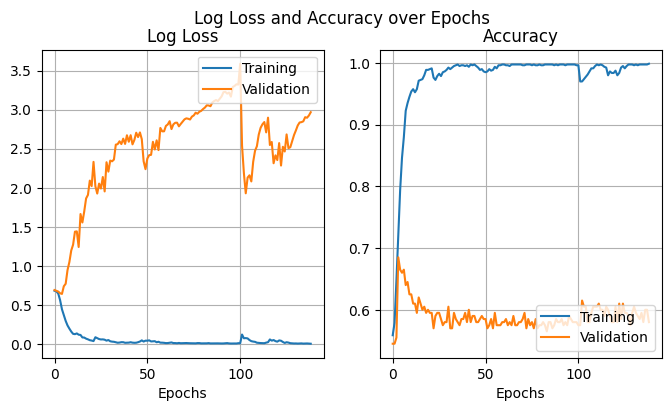

In [229]:
lstm_ebm.train(LR=lstm_emb_params.iloc[-1]['params_learning_rate'],
              epochs=lstm_emb_params.iloc[-1]['params_epochs'],
              batch_size=lstm_emb_params.iloc[-1]['params_batch_size'],
              verbose=1,
              validation_split=0.2)

lstm_ebm.plot_loss_accuracy()


In [230]:
lstm_ebm_split = comp.test_split_ratio(dataset,
                                      "LSTM",
                                      "EBM",
                                      learning_rate=lstm_emb_params.iloc[-1]['params_learning_rate'],
                                      epochs=lstm_emb_params.iloc[-1]['params_epochs'],
                                      units=lstm_emb_params.iloc[-1]['params_units'],
                                      batch_size=lstm_emb_params.iloc[-1]['params_batch_size'],
                                      two_layers=lstm_emb_params.iloc[-1]['params_two_layers']
                                      )

Initializing split test for LSTM, with embedding EBM.
Params: 0.013973842731605547, 139, 7
Test started.....
The result is: [(0.1, 0.62), (0.2, 0.6425), (0.3, 0.6367), (0.4, 0.6263), (0.5, 0.588)]


In [231]:
lstm_ebm_vocab = comp.test_vocab_size(df,
                                      "LSTM",
                                      "EBM",
                                      learning_rate=lstm_emb_params.iloc[-1]['params_learning_rate'],
                                      epochs=lstm_emb_params.iloc[-1]['params_epochs'],
                                      units=lstm_emb_params.iloc[-1]['params_units'],
                                      batch_size=lstm_emb_params.iloc[-1]['params_batch_size'],
                                      two_layers=lstm_emb_params.iloc[-1]['params_two_layers']
                                      )

Initializing vocab-size test for LSTM, with embedding EBM.
Params: 0.013973842731605547, 139, 7
Test started........
The result is: [(1000, 0.5475), (2000, 0.65), (3000, 0.6175), (4000, 0.6425), (5000, 0.605), (6000, 0.635), (7000, 0.585), (8000, 0.62)]


In [232]:
"""
2.5) GRU with embedding encoding
"""
gru_emb_params = rnn.find_best_rnn(X_train_EBM, Y_train_EBM, X_test_EBM, Y_test_EBM, n_trials=10, rnn_type="GRU")
gru_emb_params.to_pickle(r"checkpoints\gru_emb_params.pkl")

[I 2025-06-18 13:16:22,532] A new study created in memory with name: mlp_optimization


Epoch 1/105
48/48 [==============================] - 2s 6ms/step - loss: 0.6921 - accuracy: 0.5462 - val_loss: 0.7072 - val_accuracy: 0.5350
Epoch 2/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6187 - val_loss: 0.7921 - val_accuracy: 0.5600
Epoch 3/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6675 - val_loss: 0.7718 - val_accuracy: 0.6050
Epoch 4/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.6975 - val_loss: 0.6843 - val_accuracy: 0.5950
Epoch 5/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7113 - val_loss: 0.7722 - val_accuracy: 0.5700
Epoch 6/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7075 - val_loss: 0.7923 - val_accuracy: 0.5950
Epoch 7/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7250 - val_loss: 0.8060 - val_accuracy: 0.5900
Epoch 8/105
4

[I 2025-06-18 13:16:34,560] Trial 0 finished with values: [0.8265769481658936, 0.640999972820282] and parameters: {'epochs': 105, 'learning_rate': 0.22761320903111637, 'units': 6, 'two_layers': False, 'batch_size': 17}.


Epoch 1/156
25/25 [==============================] - 1s 15ms/step - loss: 0.6927 - accuracy: 0.5688 - val_loss: 0.7061 - val_accuracy: 0.4550
Epoch 2/156
25/25 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5337 - val_loss: 0.7079 - val_accuracy: 0.5450
Epoch 3/156
25/25 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5562 - val_loss: 0.6939 - val_accuracy: 0.5450
Epoch 4/156
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5738 - val_loss: 0.6946 - val_accuracy: 0.5450
Epoch 5/156
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5987 - val_loss: 0.7025 - val_accuracy: 0.5250
Epoch 6/156
25/25 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.5962 - val_loss: 0.6873 - val_accuracy: 0.5450
Epoch 7/156
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5788 - val_loss: 0.7615 - val_accuracy: 0.5450
Epoch 8/156


[I 2025-06-18 13:16:47,363] Trial 1 finished with values: [0.7303909063339233, 0.5289999842643738] and parameters: {'epochs': 156, 'learning_rate': 0.3693759611964146, 'units': 4, 'two_layers': True, 'batch_size': 32}.


Epoch 1/144
8/8 [==============================] - 1s 29ms/step - loss: 0.8489 - accuracy: 0.5013 - val_loss: 0.6809 - val_accuracy: 0.5450
Epoch 2/144
8/8 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6162 - val_loss: 0.7248 - val_accuracy: 0.5550
Epoch 3/144
8/8 [==============================] - 0s 4ms/step - loss: 0.6215 - accuracy: 0.6612 - val_loss: 0.7346 - val_accuracy: 0.5600
Epoch 4/144
8/8 [==============================] - 0s 4ms/step - loss: 0.5820 - accuracy: 0.7000 - val_loss: 0.7793 - val_accuracy: 0.5950
Epoch 5/144
8/8 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.7525 - val_loss: 0.8267 - val_accuracy: 0.6250
Epoch 6/144
8/8 [==============================] - 0s 4ms/step - loss: 0.4890 - accuracy: 0.7663 - val_loss: 0.8361 - val_accuracy: 0.6050
Epoch 7/144
8/8 [==============================] - 0s 5ms/step - loss: 0.4552 - accuracy: 0.8012 - val_loss: 0.8140 - val_accuracy: 0.6400
Epoch 8/144
8/8 [=========

[I 2025-06-18 13:16:52,948] Trial 2 finished with values: [0.9420983791351318, 0.6340000033378601] and parameters: {'epochs': 144, 'learning_rate': 0.37455157618025864, 'units': 7, 'two_layers': False, 'batch_size': 111}.


Epoch 1/157
9/9 [==============================] - 1s 25ms/step - loss: 0.6806 - accuracy: 0.5500 - val_loss: 0.6938 - val_accuracy: 0.5450
Epoch 2/157
9/9 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5562 - val_loss: 0.7100 - val_accuracy: 0.5450
Epoch 3/157
9/9 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5625 - val_loss: 0.6944 - val_accuracy: 0.5300
Epoch 4/157
9/9 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6175 - val_loss: 0.7467 - val_accuracy: 0.5450
Epoch 5/157
9/9 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.6363 - val_loss: 0.7092 - val_accuracy: 0.5100
Epoch 6/157
9/9 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6175 - val_loss: 0.7148 - val_accuracy: 0.5150
Epoch 7/157
9/9 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.6263 - val_loss: 0.7478 - val_accuracy: 0.5000
Epoch 8/157
9/9 [=========

[I 2025-06-18 13:16:59,167] Trial 3 finished with values: [0.9963158965110779, 0.5680000185966492] and parameters: {'epochs': 157, 'learning_rate': 0.23666133398010314, 'units': 5, 'two_layers': False, 'batch_size': 91}.


Epoch 1/112
58/58 [==============================] - 2s 8ms/step - loss: 0.7196 - accuracy: 0.5300 - val_loss: 0.7103 - val_accuracy: 0.5450
Epoch 2/112
58/58 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5550 - val_loss: 0.6918 - val_accuracy: 0.5450
Epoch 3/112
58/58 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5512 - val_loss: 0.7006 - val_accuracy: 0.5450
Epoch 4/112
58/58 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5587 - val_loss: 0.6976 - val_accuracy: 0.5450
Epoch 5/112
58/58 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.5412 - val_loss: 0.7205 - val_accuracy: 0.5450
Epoch 6/112
58/58 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.5263 - val_loss: 0.9337 - val_accuracy: 0.5450
Epoch 7/112
58/58 [==============================] - 0s 3ms/step - loss: 0.7291 - accuracy: 0.5487 - val_loss: 0.6965 - val_accuracy: 0.4550
Epoch 8/112
5

[I 2025-06-18 13:17:22,315] Trial 4 finished with values: [0.6962090730667114, 0.5720000267028809] and parameters: {'epochs': 112, 'learning_rate': 0.260471947346744, 'units': 3, 'two_layers': True, 'batch_size': 14}.


Epoch 1/111
4/4 [==============================] - 2s 104ms/step - loss: 0.6895 - accuracy: 0.5487 - val_loss: 0.6984 - val_accuracy: 0.5450
Epoch 2/111
4/4 [==============================] - 0s 8ms/step - loss: 0.6890 - accuracy: 0.5562 - val_loss: 0.6930 - val_accuracy: 0.5450
Epoch 3/111
4/4 [==============================] - 0s 8ms/step - loss: 0.6816 - accuracy: 0.5788 - val_loss: 0.6924 - val_accuracy: 0.5450
Epoch 4/111
4/4 [==============================] - 0s 9ms/step - loss: 0.6830 - accuracy: 0.5788 - val_loss: 0.6909 - val_accuracy: 0.5450
Epoch 5/111
4/4 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.5788 - val_loss: 0.6955 - val_accuracy: 0.5450
Epoch 6/111
4/4 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.5788 - val_loss: 0.6828 - val_accuracy: 0.5450
Epoch 7/111
4/4 [==============================] - 0s 8ms/step - loss: 0.6573 - accuracy: 0.5788 - val_loss: 0.6858 - val_accuracy: 0.5050
Epoch 8/111
4/4 [========

[I 2025-06-18 13:17:27,305] Trial 5 finished with values: [0.9945704936981201, 0.6209999918937683] and parameters: {'epochs': 111, 'learning_rate': 0.3545590222809112, 'units': 2, 'two_layers': True, 'batch_size': 228}.


Epoch 1/155
22/22 [==============================] - 2s 17ms/step - loss: 0.6899 - accuracy: 0.5462 - val_loss: 0.6990 - val_accuracy: 0.5450
Epoch 2/155
22/22 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.6612 - val_loss: 0.7017 - val_accuracy: 0.6100
Epoch 3/155
22/22 [==============================] - 0s 4ms/step - loss: 0.5103 - accuracy: 0.7638 - val_loss: 0.7425 - val_accuracy: 0.5650
Epoch 4/155
22/22 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.7900 - val_loss: 0.8362 - val_accuracy: 0.6050
Epoch 5/155
22/22 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.8213 - val_loss: 0.9119 - val_accuracy: 0.5800
Epoch 6/155
22/22 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.8200 - val_loss: 0.9170 - val_accuracy: 0.6050
Epoch 7/155
22/22 [==============================] - 0s 4ms/step - loss: 0.3855 - accuracy: 0.8500 - val_loss: 1.0805 - val_accuracy: 0.5450
Epoch 8/155


[I 2025-06-18 13:17:41,316] Trial 6 finished with values: [0.8163777589797974, 0.6230000257492065] and parameters: {'epochs': 155, 'learning_rate': 0.15228214674341675, 'units': 3, 'two_layers': True, 'batch_size': 38}.


Epoch 1/180
4/4 [==============================] - 2s 104ms/step - loss: 0.6860 - accuracy: 0.5337 - val_loss: 0.6988 - val_accuracy: 0.5450
Epoch 2/180
4/4 [==============================] - 0s 8ms/step - loss: 0.6803 - accuracy: 0.5788 - val_loss: 0.6887 - val_accuracy: 0.5450
Epoch 3/180
4/4 [==============================] - 0s 8ms/step - loss: 0.6783 - accuracy: 0.5788 - val_loss: 0.6859 - val_accuracy: 0.5450
Epoch 4/180
4/4 [==============================] - 0s 8ms/step - loss: 0.6694 - accuracy: 0.5788 - val_loss: 0.6863 - val_accuracy: 0.5450
Epoch 5/180
4/4 [==============================] - 0s 8ms/step - loss: 0.6428 - accuracy: 0.5800 - val_loss: 0.6749 - val_accuracy: 0.5850
Epoch 6/180
4/4 [==============================] - 0s 8ms/step - loss: 0.5733 - accuracy: 0.7462 - val_loss: 0.6844 - val_accuracy: 0.6250
Epoch 7/180
4/4 [==============================] - 0s 8ms/step - loss: 0.5061 - accuracy: 0.7375 - val_loss: 0.7056 - val_accuracy: 0.6650
Epoch 8/180
4/4 [========

[I 2025-06-18 13:17:48,482] Trial 7 finished with values: [2.213826894760132, 0.6259999871253967] and parameters: {'epochs': 180, 'learning_rate': 0.01829926943017842, 'units': 8, 'two_layers': True, 'batch_size': 248}.


Epoch 1/192
22/22 [==============================] - 2s 11ms/step - loss: 0.6978 - accuracy: 0.5325 - val_loss: 0.7077 - val_accuracy: 0.5250
Epoch 2/192
22/22 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5562 - val_loss: 0.6853 - val_accuracy: 0.5750
Epoch 3/192
22/22 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5437 - val_loss: 0.6633 - val_accuracy: 0.6050
Epoch 4/192
22/22 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6237 - val_loss: 0.6708 - val_accuracy: 0.6100
Epoch 5/192
22/22 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6762 - val_loss: 0.6814 - val_accuracy: 0.6000
Epoch 6/192
22/22 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7500 - val_loss: 0.7319 - val_accuracy: 0.5900
Epoch 7/192
22/22 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7325 - val_loss: 0.7255 - val_accuracy: 0.6350
Epoch 8/192


[I 2025-06-18 13:18:00,843] Trial 8 finished with values: [0.9296056032180786, 0.5860000252723694] and parameters: {'epochs': 192, 'learning_rate': 0.290062176634943, 'units': 9, 'two_layers': False, 'batch_size': 38}.


Epoch 1/118
5/5 [==============================] - 2s 79ms/step - loss: 0.7309 - accuracy: 0.5537 - val_loss: 0.6878 - val_accuracy: 0.5450
Epoch 2/118
5/5 [==============================] - 0s 7ms/step - loss: 0.6626 - accuracy: 0.6438 - val_loss: 0.6978 - val_accuracy: 0.5650
Epoch 3/118
5/5 [==============================] - 0s 7ms/step - loss: 0.5566 - accuracy: 0.7350 - val_loss: 0.7370 - val_accuracy: 0.6050
Epoch 4/118
5/5 [==============================] - 0s 7ms/step - loss: 0.4628 - accuracy: 0.7975 - val_loss: 0.9030 - val_accuracy: 0.6000
Epoch 5/118
5/5 [==============================] - 0s 7ms/step - loss: 0.4050 - accuracy: 0.8325 - val_loss: 0.7680 - val_accuracy: 0.6450
Epoch 6/118
5/5 [==============================] - 0s 7ms/step - loss: 0.3208 - accuracy: 0.8813 - val_loss: 0.9305 - val_accuracy: 0.6400
Epoch 7/118
5/5 [==============================] - 0s 7ms/step - loss: 0.2958 - accuracy: 0.8863 - val_loss: 0.9268 - val_accuracy: 0.6000
Epoch 8/118
5/5 [=========

[I 2025-06-18 13:18:06,621] Trial 9 finished with values: [1.1588115692138672, 0.621999979019165] and parameters: {'epochs': 118, 'learning_rate': 0.19302851603521992, 'units': 4, 'two_layers': True, 'batch_size': 167}.


In [233]:
gru_emb_params

,loss,accuracy,params_batch_size,params_epochs,params_learning_rate,params_two_layers,params_units,time,trial_time,name
0,0.730391,0.529,32,156,0.369376,True,4,12.803453,12.803453,GRU_EBM
1,0.996316,0.568,91,157,0.236661,False,5,6.219492,6.219492,GRU_EBM
2,0.696209,0.572,14,112,0.260472,True,3,23.146857,23.146857,GRU_EBM
3,0.929606,0.586,38,192,0.290062,False,9,12.359966,12.359966,GRU_EBM
4,0.994570,0.621,228,111,0.354559,True,2,4.988337,4.988337,GRU_EBM
5,1.158812,0.622,167,118,0.193029,True,4,5.776887,5.776887,GRU_EBM
6,0.816378,0.623,38,155,0.152282,True,3,14.010236,14.010236,GRU_EBM
7,2.213827,0.626,248,180,0.018299,True,8,7.165092,7.165092,GRU_EBM
8,0.942098,0.634,111,144,0.374552,False,7,5.583212,5.583212,GRU_EBM
9,0.826577,0.641,17,105,0.227613,False,6,12.026911,12.026911,GRU_EBM


Epoch 1/105
48/48 [==============================] - 1s 6ms/step - loss: 0.7020 - accuracy: 0.5512 - val_loss: 0.6886 - val_accuracy: 0.5450
Epoch 2/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5688 - val_loss: 0.6698 - val_accuracy: 0.6100
Epoch 3/105
48/48 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.6500 - val_loss: 0.6989 - val_accuracy: 0.6400
Epoch 4/105
48/48 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.6888 - val_loss: 0.7323 - val_accuracy: 0.5400
Epoch 5/105
48/48 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7362 - val_loss: 0.7220 - val_accuracy: 0.6150
Epoch 6/105
48/48 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7788 - val_loss: 0.7350 - val_accuracy: 0.6050
Epoch 7/105
48/48 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7675 - val_loss: 0.8573 - val_accuracy: 0.5700
Epoch 8/105
4

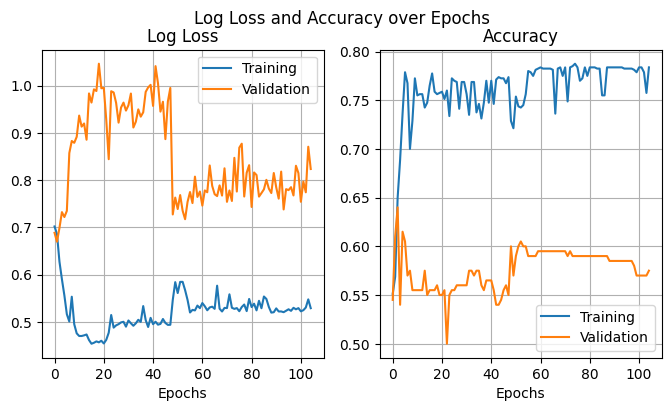

In [234]:
gru_ebm = rnn.Recurrent_Model(X=X_train_EBM,
                              Y=Y_train_EBM,
                              input_dim=1004,
                              output_dim=1,
                              units=gru_emb_params.iloc[-1]['params_units'],
                              rnn_type="GRU",
                              two_layers=gru_emb_params.iloc[-1]['params_two_layers'])

gru_ebm.train(LR=gru_emb_params.iloc[-1]['params_learning_rate'],
              epochs=gru_emb_params.iloc[-1]['params_epochs'],
              batch_size=gru_emb_params.iloc[-1]['params_batch_size'],
              verbose=1,
              validation_split=0.2)

gru_ebm.plot_loss_accuracy()

In [235]:
gru_ebm_split = comp.test_split_ratio(dataset,
                                      "GRU",
                                      "EBM",
                                      learning_rate=gru_emb_params.iloc[-1]['params_learning_rate'],
                                      epochs=gru_emb_params.iloc[-1]['params_epochs'],
                                      units=gru_emb_params.iloc[-1]['params_units'],
                                      batch_size=gru_emb_params.iloc[-1]['params_batch_size'],
                                      two_layers=gru_emb_params.iloc[-1]['params_two_layers']
                                      )

Initializing split test for GRU, with embedding EBM.
Params: 0.22761320903111637, 105, 6
Test started.....
The result is: [(0.1, 0.57), (0.2, 0.6125), (0.3, 0.5717), (0.4, 0.6225), (0.5, 0.615)]


In [236]:
gru_ebm_vocab = comp.test_vocab_size(df,
                                      "GRU",
                                      "EBM",
                                      learning_rate=gru_emb_params.iloc[-1]['params_learning_rate'],
                                      epochs=gru_emb_params.iloc[-1]['params_epochs'],
                                      units=gru_emb_params.iloc[-1]['params_units'],
                                      batch_size=gru_emb_params.iloc[-1]['params_batch_size'],
                                      two_layers=gru_emb_params.iloc[-1]['params_two_layers']
                                      )

Initializing vocab-size test for GRU, with embedding EBM.
Params: 0.22761320903111637, 105, 6
Test started........
The result is: [(1000, 0.5725), (2000, 0.5825), (3000, 0.6275), (4000, 0.6125), (5000, 0.5875), (6000, 0.5875), (7000, 0.58), (8000, 0.5725)]


In [237]:
"""
3) Upload data to the class for comparison
"""
table = tb.Table()
table.add_record(name="rnn_emb",
                 epoch=rnn_emb_params.iloc[-1]["params_epochs"],
                 lr=rnn_emb_params.iloc[-1]["params_learning_rate"],
                 accuracy=rnn_emb_params.iloc[-1]["accuracy"],
                 loss=rnn_emb_params.iloc[-1]["loss"],
                 units=rnn_emb_params.iloc[-1]["params_units"],
                 avg_time=rnn_emb_params.iloc[-1]["time"],
                 batch_size=rnn_emb_params.iloc[-1]["params_batch_size"],
                 two_layers=rnn_emb_params.iloc[-1]["params_two_layers"],
                 split_accuracy=rnn_ebm_split,
                 vocab_accuracy=rnn_ebm_vocab)

table.add_record(name="lstm_emb",
                 epoch=lstm_emb_params.iloc[-1]["params_epochs"],
                 lr=lstm_emb_params.iloc[-1]["params_learning_rate"],
                 accuracy=lstm_emb_params.iloc[-1]["accuracy"],
                 loss=lstm_emb_params.iloc[-1]["loss"],
                 units=lstm_emb_params.iloc[-1]["params_units"],
                 avg_time=lstm_emb_params.iloc[-1]["time"],
                 batch_size=lstm_emb_params.iloc[-1]["params_batch_size"],
                 two_layers=lstm_emb_params.iloc[-1]["params_two_layers"],
                 split_accuracy=lstm_ebm_split,
                 vocab_accuracy=lstm_ebm_vocab)

table.add_record(name="gru_emb",
                 epoch=gru_emb_params.iloc[-1]["params_epochs"],
                 lr=gru_emb_params.iloc[-1]["params_learning_rate"],
                 accuracy=gru_emb_params.iloc[-1]["accuracy"],
                 loss=gru_emb_params.iloc[-1]["loss"],
                 units=gru_emb_params.iloc[-1]["params_units"],
                 avg_time=gru_emb_params.iloc[-1]["time"],
                 batch_size=gru_emb_params.iloc[-1]["params_batch_size"],
                 two_layers=gru_emb_params.iloc[-1]["params_two_layers"],
                 split_accuracy=gru_ebm_split,
                 vocab_accuracy=gru_ebm_vocab)

table.add_record(name="mlp_tdidf",
                 epoch=mlp_tdidf_params.iloc[-1]["params_epochs"],
                 lr=mlp_tdidf_params.iloc[-1]["params_learning_rate"],
                 accuracy=mlp_tdidf_params.iloc[-1]["accuracy"],
                 loss=mlp_tdidf_params.iloc[-1]["loss"],
                 units=mlp_tdidf_params.iloc[-1]["params_units"],
                 avg_time=mlp_tdidf_params.iloc[-1]["time"],
                 split_accuracy=mlp_tdidf_split,
                 vocab_accuracy=mlp_tdidf_vocab)

table.add_record(name="mlp_bow",
                 epoch=mlp_bow_params.iloc[-1]["params_epochs"],
                 lr=mlp_bow_params.iloc[-1]["params_learning_rate"],
                 accuracy=mlp_bow_params.iloc[-1]["accuracy"],
                 loss=mlp_bow_params.iloc[-1]["loss"],
                 units=mlp_bow_params.iloc[-1]["params_units"],
                 avg_time=mlp_bow_params.iloc[-1]["time"],
                 split_accuracy=mlp_bow_split,
                 vocab_accuracy=mlp_bow_vocab)

Adding a new record with params: name: rnn_emb, epoch: 104, lr: 0.30943618825312785, units: 6, average time: 3.87679
Adding a new record with params: name: lstm_emb, epoch: 139, lr: 0.013973842731605547, units: 7, average time: 5.757677
Adding a new record with params: name: gru_emb, epoch: 105, lr: 0.22761320903111637, units: 6, average time: 12.026911
Adding a new record with params: name: mlp_tdidf, epoch: 120, lr: 0.17733453143144448, units: 7, average time: 3.630928
Adding a new record with params: name: mlp_bow, epoch: 122, lr: 0.07303664279842886, units: 9, average time: 2.886153


In [238]:
table.show(tabulate_view=False)


Table info:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5 non-null      object 
 1   epochs          5 non-null      int64  
 2   accuracy        5 non-null      float64
 3   loss            5 non-null      float64
 4   lr              5 non-null      float64
 5   units           5 non-null      int64  
 6   avg_time        5 non-null      float64
 7   split_accuracy  5 non-null      object 
 8   vocab_accuracy  5 non-null      object 
 9   two_layers      5 non-null      int64  
 10  batch_size      5 non-null      int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 480.0+ bytes

Records preview:


,name,epochs,accuracy,loss,lr,units,avg_time,split_accuracy,vocab_accuracy,two_layers,batch_size
0,rnn_emb,104,0.572,0.716631,0.309436,6,3.876790,"[(0.1, 0.57), (0.2, 0.5575), (0.3, 0.44), (0.4...","[(1000, 0.5725), (2000, 0.4275), (3000, 0.5725...",1,133
1,lstm_emb,139,0.631,3.315922,0.013974,7,5.757677,"[(0.1, 0.62), (0.2, 0.6425), (0.3, 0.6367), (0...","[(1000, 0.5475), (2000, 0.65), (3000, 0.6175),...",0,82
2,gru_emb,105,0.641,0.826577,0.227613,6,12.026911,"[(0.1, 0.57), (0.2, 0.6125), (0.3, 0.5717), (0...","[(1000, 0.5725), (2000, 0.5825), (3000, 0.6275...",0,17
3,mlp_tdidf,120,0.700,0.568732,0.177335,7,3.630928,"[(0.1, 0.72), (0.2, 0.68), (0.3, 0.6667), (0.4...","[(1000, 0.72), (2000, 0.7125), (3000, 0.7125),...",0,0
4,mlp_bow,122,0.689,0.633902,0.073037,9,2.886153,"[(0.1, 0.69), (0.2, 0.6725), (0.3, 0.685), (0....","[(1000, 0.68), (2000, 0.695), (3000, 0.7), (40...",0,0


In [239]:
table.print_best_accuracy()


Top 3 best accuracies:
1) 0.7000 for mlp_tdidf
2) 0.6890 for mlp_bow
3) 0.6410 for gru_emb


In [240]:
all = tb.All_trials_table()
all.add_record(mlp_tdidf_params)
all.add_record(rnn_emb_params)
all.add_record(mlp_bow_params)
all.add_record(lstm_emb_params)
all.add_record(gru_emb_params)
all.show(tabulate_view=False)

Adding a new record with params.
Adding a new record with params.
Adding a new record with params.
Adding a new record with params.
Adding a new record with params.

Table info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loss                  50 non-null     float64
 1   accuracy              50 non-null     float64
 2   params_epochs         50 non-null     object 
 3   params_learning_rate  50 non-null     float64
 4   params_units          50 non-null     object 
 5   time                  50 non-null     float64
 6   trial_time            50 non-null     float64
 7   name                  50 non-null     object 
 8   params_batch_size     30 non-null     float64
 9   params_two_layers     30 non-null     object 
dtypes: float64(6), object(4)
memory usage: 4.0+ KB

Records preview:


C:\Python_files\DL_final2\source\table.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


,loss,accuracy,params_epochs,params_learning_rate,params_units,time,trial_time,name,params_batch_size,params_two_layers
0,0.678091,0.5725,169,0.022047,5,4.800748,4.800748,MLP_TDIDF,NaN,NaN
1,0.632981,0.6450,109,0.077510,3,3.203553,3.203553,MLP_TDIDF,NaN,NaN
2,0.929825,0.6675,181,0.388818,2,5.174742,5.174742,MLP_TDIDF,NaN,NaN
3,0.911016,0.6725,167,0.389479,8,4.808715,4.808715,MLP_TDIDF,NaN,NaN
4,0.613686,0.6750,161,0.050273,8,4.665123,4.665123,MLP_TDIDF,NaN,NaN
5,0.558099,0.6825,162,0.094548,6,4.628963,4.628963,MLP_TDIDF,NaN,NaN
6,0.705624,0.6825,199,0.190604,6,5.622569,5.622569,MLP_TDIDF,NaN,NaN
7,0.564201,0.6925,128,0.163151,6,3.764288,3.764288,MLP_TDIDF,NaN,NaN
8,0.606234,0.6975,115,0.335054,2,3.312702,3.312702,MLP_TDIDF,NaN,NaN
9,0.568732,0.7000,120,0.177335,7,3.630928,3.630928,MLP_TDIDF,NaN,NaN


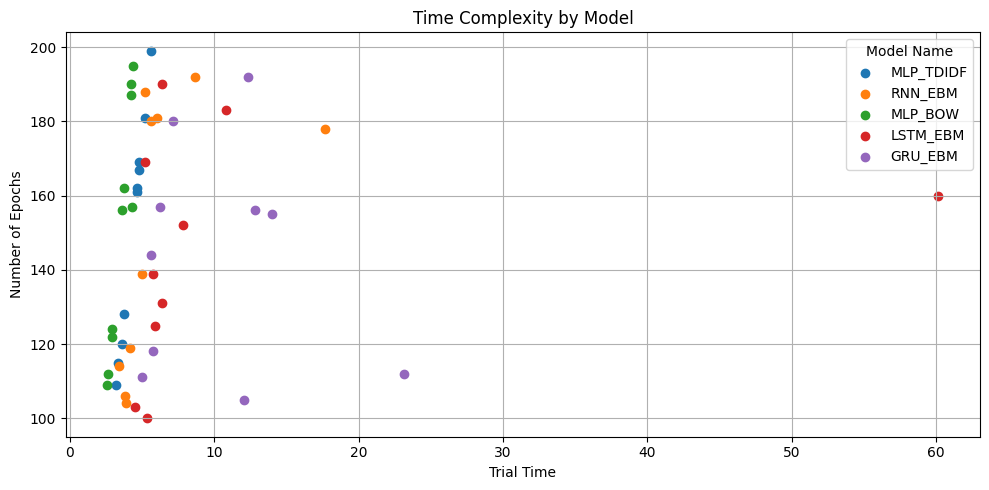

In [241]:
all.plot_time_complexity()

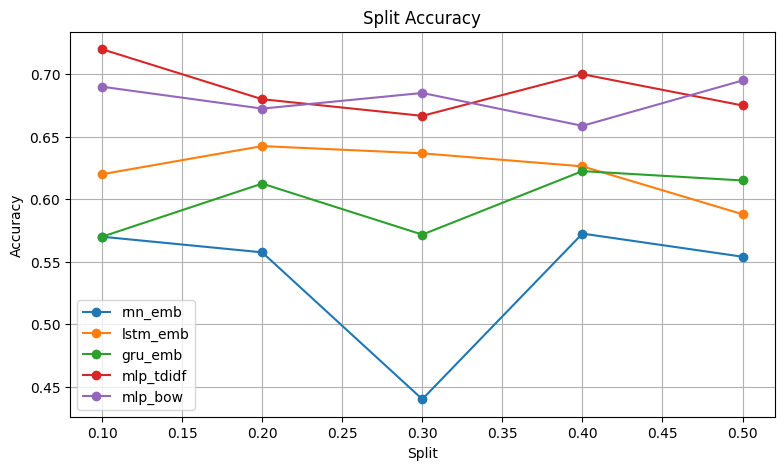

In [242]:
table.plot_split_accuracy()

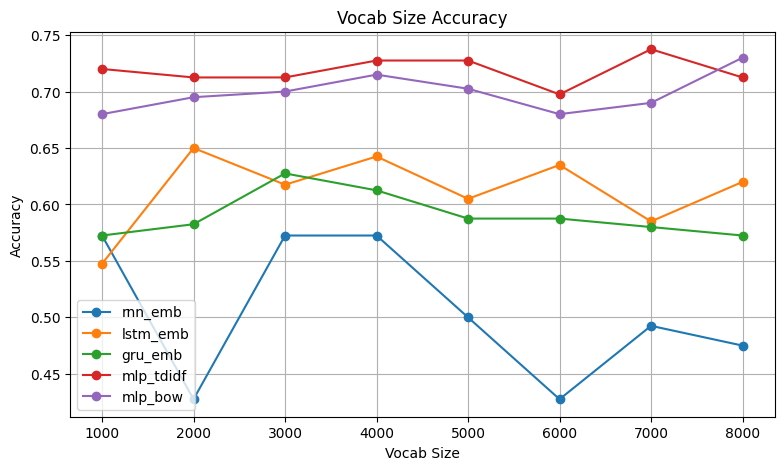

In [243]:
table.plot_vocab_accuracy()